In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-driven-assignment2/mnist_fashion_test.csv
/kaggle/input/data-driven-assignment2/mnist_fashion_train.csv
/kaggle/input/data-driven-assignment2/LifeExpectancyData.csv


# **Comparing Linear Regression, Ridge Regression, and Elastic Net in Scikit-Learn**

## **1. Introduction**
This notebook implements and compares three regression models using the **LifeExpectancyData.csv** dataset:
- **Linear Regression**
- **Ridge Regression**
- **Elastic Net Regression**

In [2]:
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,ElasticNet,ElasticNetCV 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import torch
import missingno as msno # forgraphical of  missing value
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
df= pd.read_csv('/kaggle/input/data-driven-assignment2/LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.columns = df.columns.str.strip() # remove left strip in dataset 

In [7]:
df.isna().sum()# To check whether there is missing value or not

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

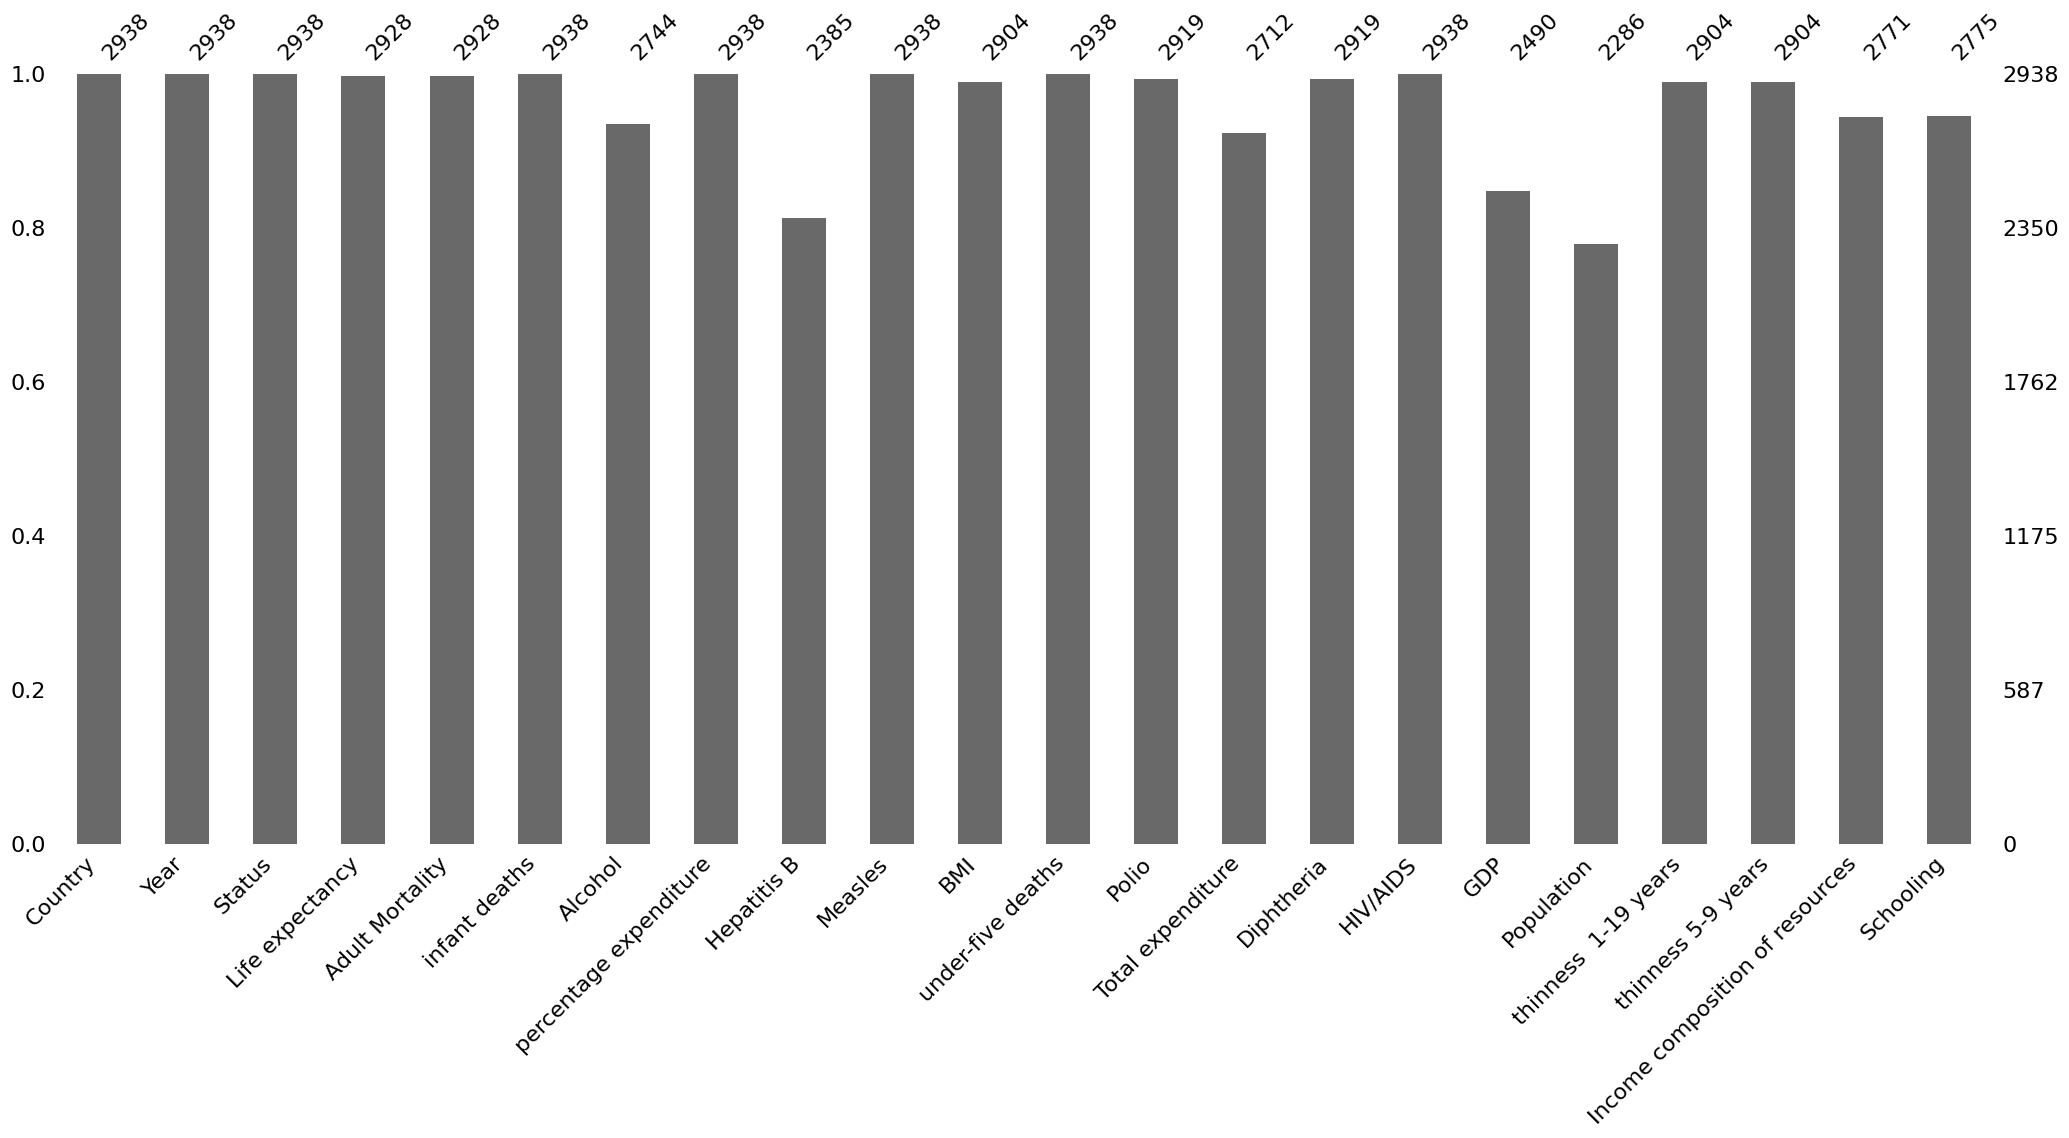

In [8]:
msno.bar(df)  # Visualize missing values
plt.show()

Above graph shows columns with missing values.

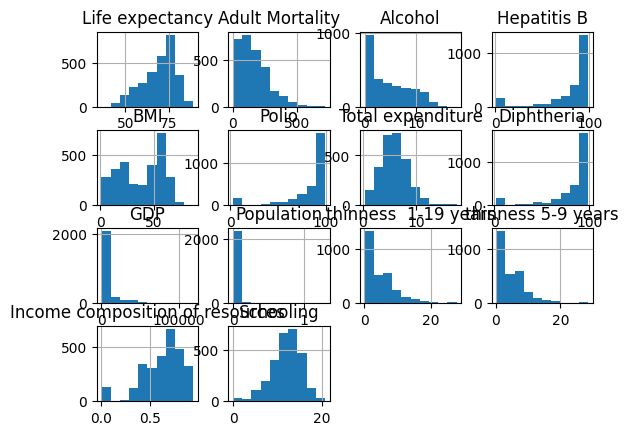

In [9]:

df[['Life expectancy','Adult Mortality','Alcohol','Hepatitis B'
    ,'BMI','Polio','Total expenditure','Diphtheria','GDP','Population'
   ,'thinness  1-19 years','thinness 5-9 years','Income composition of resources'
   ,'Schooling']].hist();

Above graph guides us to know how to fill missing values in dataset either using mean or median according to the shape made in each figure.

In [10]:
# Here is the way of filling those missing values in those column mentioned below
df['Life expectancy'].fillna(df['Life expectancy'].median(),inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].median(),inplace=True)
df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['Polio'].fillna(df['Polio'].median(),inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(),inplace=True)
df['Diphtheria'].fillna(df['Diphtheria'].median(),inplace=True)
df['GDP'].fillna(df['GDP'].mean(),inplace=True)
df['Population'].fillna(df['Population'].mean(),inplace=True)
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].median(),inplace=True)
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].median(),inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(),inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)


<ipython-input-10-7aedf744d497>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Life expectancy'].fillna(df['Life expectancy'].median(),inplace=True)
<ipython-input-10-7aedf744d497>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [11]:
# Indicate if there is missing value remained in our dataset or not
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
# To see if Status is categorical or not
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [13]:
# By applying One Hot Encoder to give label 0 and 1 to developed and developing respectively
encoder=OneHotEncoder(sparse=False)
encoded=encoder.fit_transform(df[['Status']])
df_encoded=pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Status']))
df_encoded.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Status_Developed,Status_Developing
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [14]:
# It concatinates transformed dataset with the orignal one 
df=pd.concat([df.drop(columns=['Status']), df_encoded], axis=1)



In [15]:
df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [16]:
correlation=df.drop(columns=['Country']).corr()
correlation

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108327,-0.042937,...,0.131373,-0.139741,0.093351,0.014951,-0.047827,-0.050859,0.236333,0.203471,-0.001864,0.001864
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.560453,-0.222738,...,0.472211,-0.556703,0.430211,-0.019683,-0.468002,-0.462473,0.692560,0.714358,0.481415,-0.481415
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.382143,0.094280,...,-0.270301,0.523886,-0.276920,-0.012474,0.296135,0.301634,-0.440143,-0.434756,-0.314894,0.314894
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.227220,0.996629,...,-0.175376,0.025231,-0.107109,0.548522,0.464811,0.470445,-0.143663,-0.191757,-0.112252,0.112252
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.314697,-0.109790,...,0.212388,-0.046235,0.318869,-0.030174,-0.413021,-0.402034,0.414507,0.497105,0.579662,-0.579662
percentage expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.228537,-0.087852,...,0.142506,-0.097857,0.888140,-0.024648,-0.249610,-0.251144,0.380374,0.388105,0.454261,-0.454261
Hepatitis B,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112438,-0.170549,...,0.449151,-0.085497,0.079848,-0.117007,-0.097576,-0.100576,0.117516,0.140961,0.127008,-0.127008
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.175925,0.507809,...,-0.142385,0.030899,-0.068060,0.236250,0.224870,0.221138,-0.115764,-0.122609,-0.076955,0.076955
BMI,0.108327,0.560453,-0.382143,-0.227220,0.314697,0.228537,0.112438,-0.175925,1.000000,-0.237586,...,0.281188,-0.243548,0.276645,-0.063238,-0.531651,-0.538533,0.479837,0.508105,0.310873,-0.310873
under-five deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237586,1.000000,...,-0.195808,0.038062,-0.110640,0.535864,0.466697,0.471167,-0.161533,-0.207111,-0.115195,0.115195


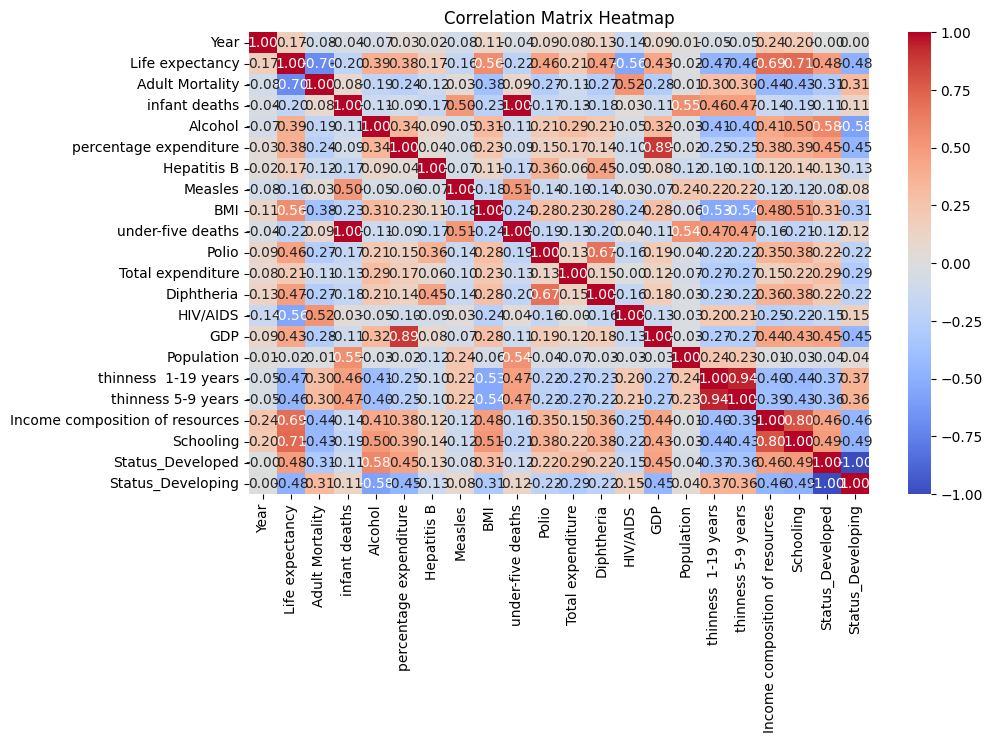

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Here figure shows the easier way to capture features with high multicollinearity which may cause trouble in the model and to handle this issue , can use below method.

In [18]:
Features= df.drop(columns=['Life expectancy','Country','Year'])
target=df['Life expectancy']

In [19]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult Mortality                  2938 non-null   float64
 1   infant deaths                    2938 non-null   int64  
 2   Alcohol                          2938 non-null   float64
 3   percentage expenditure           2938 non-null   float64
 4   Hepatitis B                      2938 non-null   float64
 5   Measles                          2938 non-null   int64  
 6   BMI                              2938 non-null   float64
 7   under-five deaths                2938 non-null   int64  
 8   Polio                            2938 non-null   float64
 9   Total expenditure                2938 non-null   float64
 10  Diphtheria                       2938 non-null   float64
 11  HIV/AIDS                         2938 non-null   float64
 12  GDP                 

In [20]:
# Remove  features with high multicollinearity
Features_filtered = Features.drop(columns=[
    'infant deaths', 'under-five deaths', 'Hepatitis B', 'Polio', 
    'Diphtheria', 'thinness  1-19 years', 'thinness 5-9 years', 
    'Income composition of resources', 'Schooling','Status_Developed','Status_Developing'])

In [21]:
# Splitting data by using train_test_split()
X_train,X_test,y_train,y_test=train_test_split(Features_filtered, target, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2350, 9)
(2350,)
(588, 9)
(588,)


In [22]:
# Normalize X_train to have the same scale on data
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [23]:
# Instatiate model and fit model
model = LinearRegression()
reg=model.fit(X_train_scaled, y_train)
reg

LinearRegression()

In [24]:
# To see how model is trained
reg.score(X_train_scaled, y_train)

0.7008962297970056

In [25]:
# Display the coefficients of estimated parameters of linear regression model
reg.coef_

array([-3.81755102,  1.59654054, -0.09238555, -0.8764345 ,  2.11724591,
        0.28800376, -2.52051169,  1.56808212,  0.1364661 ])

In [26]:
# Display the intercept of linear regression model
reg.intercept_

69.2867659574468

In [27]:
# Compute Mean Squared Error (MSE)
y_pred=reg.predict(X_test_scaled)
mse0 = mean_squared_error(y_test, y_pred)
mse0

26.810465286940563

In [28]:
# Compute R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.6906509711862155


In [29]:
alphas= np.logspace(-3,3,10)
mse=[]
for value in alphas:
    ridge = Ridge(alpha=value)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    mse.append(mean_squared_error(y_test, y_pred))


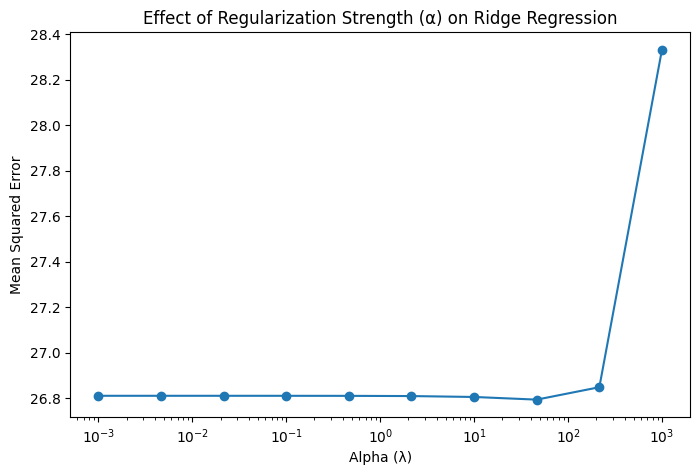

In [30]:
# Plot α vs MSE
plt.figure(figsize=(8, 5))
plt.plot(alphas, mse, marker='o')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Alpha (λ)")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Regularization Strength (α) on Ridge Regression")
plt.show()

We can take optimal alpha by using above figure but it's not obvious to get it. This enforce me to apply **Cross validation** to obtain exact alpha as below:

In [31]:
# Apply cross validation to get optimal alpha values
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)
print(f"Optimal Alpha: {ridge_cv.alpha_}")

Optimal Alpha: 46.41588833612773


After getting this **optimal alpha:46.41588833612773**, it's a time to exercise it as below: 

In [32]:
model1=Ridge(alpha=46.41588833612773)
ridge1=model1.fit(X_train_scaled,y_train)
ridge1

Ridge(alpha=46.41588833612773)

In [33]:
ridge1.score(X_train_scaled, y_train)

0.7007941659847978

In [34]:
y_pred2=ridge1.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'Mean Square Error of ridge:',mse2)

26.79363458512451

In [ ]:
r22 = r2_score(y_test, y_pred2)
print(f'R² Score of ridge:',r22)

In [36]:
l1_ratios = np.linspace(0.1, 0.9, 5)  # Mix of Ridge & Lasso


elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_net_cv.fit(X_train_scaled, y_train)
print(f"Optimal Alpha: {elastic_net_cv.alpha_}")
print(f"Optimal L1 Ratio: {elastic_net_cv.l1_ratio_}")

Optimal Alpha: 0.021544346900318832
Optimal L1 Ratio: 0.7000000000000001


In [37]:
# Instatiate model
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.9, random_state=42)

# Train the model
elastic_net.fit(X_train_scaled, y_train)

y_pred3 = elastic_net.predict(X_test_scaled)

mse3 = mean_squared_error(y_test, y_pred3)
print(f"Mean Squared Error: {mse3}")
r23 = r2_score(y_test, y_pred3)
print(f"R² Score: {r23}")

Mean Squared Error: 26.80991936683483
R² Score: 0.6906572702135808


In [38]:
print("Model Performance Comparison:")
print(f"Linear Regression  -> MSE: {mse0}, R²: {r2}")
print(f"Ridge Regression   -> MSE: {mse2}, R²: {r22}")
print(f"ElasticNet         -> MSE: {mse3}, R²: {r23}")

Model Performance Comparison:
Linear Regression  -> MSE: 26.810465286940563, R²: 0.6906509711862155
Ridge Regression   -> MSE: 26.79363458512451, R²: 0.6908451700263075
ElasticNet         -> MSE: 26.80991936683483, R²: 0.6906572702135808


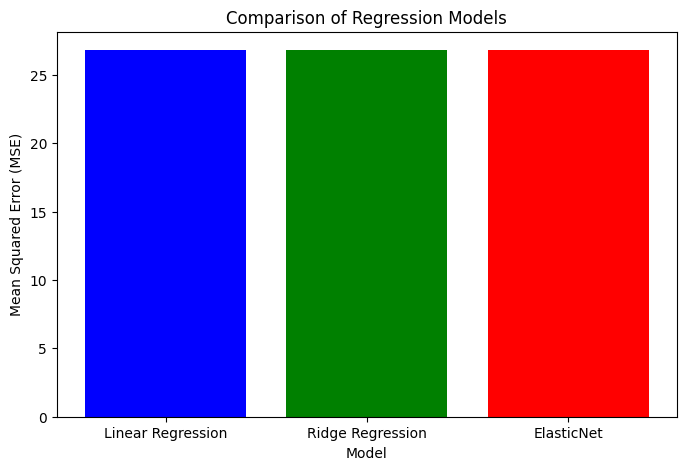

In [39]:
models = ['Linear Regression', 'Ridge Regression', 'ElasticNet']
mse_values = [mse0, mse2, mse3]

plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models")
plt.show()

Regularization has minimal impact on performance.Since the MSE and R² scores are almost identical across all models.

**Ridge Regression** has a slightly better MSE (26.7936) and R² (0.69085). Ridge Regression performs best among the three.It slightly reduces MSE compared to Linear Regression.

**Elastic Net** does not show significant improvement over Linear Regression, meaning L1 regularization (Lasso) is not very helpful for this dataset.


 # Qn2. Deep Learning with CNN for Clothing Classification using Fashion-MNIST dataset.

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a) Use PyTorch to design a CNN model for clothing classification with suitable input dimension,
 convolutional layers, fully connected layers, and an output layer.

In [41]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model
model = CNNModel()

In [42]:
# Loading data
train_data = pd.read_csv("/kaggle/input/data-driven-assignment2/mnist_fashion_train.csv")
test_data = pd.read_csv("/kaggle/input/data-driven-assignment2/mnist_fashion_test.csv")

The code of extracting features and labels from a dataset ,convert DataFrame into NumPy array and reshapes the images for input into a CNN model as follow:

In [43]:
X_train = train_data.iloc[:, 1:].values.reshape(-1, 1, 28, 28)  # Reshape to 28x28 images
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values.reshape(-1, 1, 28, 28)
y_test = test_data.iloc[:, 0].values

In [44]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) / 255.0  # Normalize pixel values (0-1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32) / 255.0
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [45]:
class FashionMNISTDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [46]:
train_dataset = FashionMNISTDataset(X_train_tensor, y_train_tensor)
test_dataset = FashionMNISTDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [47]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  
        self.fc2 = nn.Linear(128, 10)  
        self.relu = nn.ReLU()  
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  
        x = self.pool(self.relu(self.conv2(x)))  
        x = x.view(-1, 64 * 7 * 7)  
        x = self.relu(self.fc1(x)) 
        x = self.dropout(x) 
        x = self.fc2(x)  
        return x

# Instantiate the model
model = CNNModel()

b) Use the dataset mnist_fashion_train.csv for training the CNN from 2a) and the test its
 performance using mnist_fashion_test.csv

In [48]:

train_data = pd.read_csv("/kaggle/input/data-driven-assignment2/mnist_fashion_train.csv")
test_data = pd.read_csv("/kaggle/input/data-driven-assignment2/mnist_fashion_test.csv")

X_train = train_data.iloc[:, 1:].values.reshape(-1, 1, 28, 28)
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values.reshape(-1, 1, 28, 28)
y_test = test_data.iloc[:, 0].values

# Convert to PyTorch tensors & normalize
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) / 255.0
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) / 255.0
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [49]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training Complete!")

Epoch [1/10], Loss: 0.5666
Epoch [2/10], Loss: 0.3854
Epoch [3/10], Loss: 0.3310
Epoch [4/10], Loss: 0.3013
Epoch [5/10], Loss: 0.2738
Epoch [6/10], Loss: 0.2578
Epoch [7/10], Loss: 0.2378
Epoch [8/10], Loss: 0.2233
Epoch [9/10], Loss: 0.2102
Epoch [10/10], Loss: 0.1988
Training Complete!


In [50]:
model.eval()  
correct = 0
total = 0

with torch.no_grad(): 
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 91.62%


Test accuracy of model before applying augmentation is 91.62%.

c) Use data augmentation in order to improve the generalisation properties your CNN model.
 Data augumentation is used to increase the size and diversity of the dataset. New images
 can be generated from the existing ones by rotation (e.g., tilting), flipping (e.g., horizontal or
 vertical flipping), translation (e.g., shifting the image in its frame), zooming, scaling, and crop
ping (changing image size by re-scaling), contrast adjustment (e.g., chaining image lighting,
 brightness), etc.
 Hint: Use from PyTorch the torchvision.transforms function to generate new fashion
 images.

In [52]:
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])


d) Train and validate your CNN from part 2a) using the augmented Fashion-MNIST dataset.
Analyze whether the model’s performance improves

In [53]:
class FashionMNISTDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        image = self.X[idx]
        if self.transform:
            image = self.transform(image)
        return image, self.y[idx]

# Apply data augmentation
train_dataset_aug = FashionMNISTDataset(X_train_tensor, y_train_tensor, transform=train_transform)
test_dataset_aug = FashionMNISTDataset(X_test_tensor, y_test_tensor, transform=test_transform)

# Create DataLoaders
train_loader_aug = DataLoader(train_dataset_aug, batch_size=64, shuffle=True)
test_loader_aug = DataLoader(test_dataset_aug, batch_size=64, shuffle=False)

# Train model again
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader_aug:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_aug):.4f}")

print("Training Complete with Data Augmentation!")


Epoch [1/10], Loss: 0.6010
Epoch [2/10], Loss: 0.4910
Epoch [3/10], Loss: 0.4629
Epoch [4/10], Loss: 0.4465
Epoch [5/10], Loss: 0.4323
Epoch [6/10], Loss: 0.4224
Epoch [7/10], Loss: 0.4161
Epoch [8/10], Loss: 0.4110
Epoch [9/10], Loss: 0.4045
Epoch [10/10], Loss: 0.3989
Training Complete with Data Augmentation!


In [54]:
import itertools
import torch.optim as optim

# Define a function to train & evaluate the model with different hyperparameters
def train_and_evaluate(lr, batch_size, dropout_rate, optimizer_type):
    print(f"\nTraining with lr={lr}, batch_size={batch_size}, dropout={dropout_rate}, optimizer={optimizer_type.__name__}")

    # Load dataset with new batch size
    train_loader = DataLoader(train_dataset_aug, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset_aug, batch_size=batch_size, shuffle=False)

    # Define a new CNN model with dropout
    class CNNModelTuned(nn.Module):
        def __init__(self):
            super(CNNModelTuned, self).__init__()
            self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
            self.pool = nn.MaxPool2d(2, 2)
            self.fc1 = nn.Linear(64 * 7 * 7, 128)
            self.fc2 = nn.Linear(128, 10)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout_rate)

        def forward(self, x):
            x = self.pool(self.relu(self.conv1(x)))
            x = self.pool(self.relu(self.conv2(x)))
            x = x.view(-1, 64 * 7 * 7)
            x = self.relu(self.fc1(x))
            x = self.dropout(x)
            x = self.fc2(x)
            return x

    # Initialize model
    model = CNNModelTuned().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_type(model.parameters(), lr=lr)

    # Train the model
    num_epochs = 10  # Fixed for comparison
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    # Evaluate model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%\n")
    return accuracy


In [ ]:
# Define hyperparameter ranges
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]
dropout_rates = [0.3, 0.5]
optimizers = [optim.Adam, optim.SGD, optim.RMSprop]

# Store results
best_accuracy = 0
best_params = {}

# Iterate over all combinations
for lr, batch_size, dropout_rate, optimizer in itertools.product(learning_rates, batch_sizes, dropout_rates, optimizers):
    acc = train_and_evaluate(lr, batch_size, dropout_rate, optimizer)
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = {'lr': lr, 'batch_size': batch_size, 'dropout': dropout_rate, 'optimizer': optimizer.__name__}

# Print best parameters
print("\nBest Hyperparameters:", best_params)
print(f"Best Test Accuracy: {best_accuracy:.2f}%")



Training with lr=0.01, batch_size=32, dropout=0.3, optimizer=Adam
Epoch [1/10], Loss: 0.8450
Epoch [2/10], Loss: 0.7253
Epoch [3/10], Loss: 0.7048
Epoch [4/10], Loss: 0.6956
Epoch [5/10], Loss: 0.6920
Epoch [6/10], Loss: 0.6904
Epoch [7/10], Loss: 0.6835
Epoch [8/10], Loss: 0.6774
Epoch [9/10], Loss: 0.6780
Epoch [10/10], Loss: 0.6765
Test Accuracy: 80.36%


Training with lr=0.01, batch_size=32, dropout=0.3, optimizer=SGD
Epoch [1/10], Loss: 1.2775
Epoch [2/10], Loss: 0.8304
Epoch [3/10], Loss: 0.7478
Epoch [4/10], Loss: 0.6977
Epoch [5/10], Loss: 0.6601
Epoch [6/10], Loss: 0.6322
Epoch [7/10], Loss: 0.6061
Epoch [8/10], Loss: 0.5939
Epoch [9/10], Loss: 0.5776
Epoch [10/10], Loss: 0.5633
Test Accuracy: 83.33%


Training with lr=0.01, batch_size=32, dropout=0.3, optimizer=RMSprop
Epoch [1/10], Loss: 1.2629
Epoch [2/10], Loss: 0.6856
Epoch [3/10], Loss: 0.6601
Epoch [4/10], Loss: 0.6544
Epoch [5/10], Loss: 0.6496
Epoch [6/10], Loss: 0.6533
Epoch [7/10], Loss: 0.6473
Epoch [8/10], Loss: 

Till here we can prefer to take model trained by learning rate=0.001, batch size=32, dropout=0.3, optimizer=RMSprop. Because it has highest test accuracy which is equal to 89.37% amongest many we tested. Due to running time ended before completing executed of our code may be there are others. 